# Final Project: Generative AI for Data Science


## Project Scenario

You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.

The tasks assigned to you are as follows.

1. There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
2. You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price. Some specific requests by the client include:
    a. Identify number of sales for each fuel type
    b. Identify which transmission type has more price outliers
3. Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model
4. Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.

You decide to use Generative AI to create python codes that can help you analyse the data, determine the best features and create the prediction model as per requirement.

## About the Dataset

This dataset contains used car sale prices for Ford cars. This is a public dataset available on the Kaggle website as Ford Car Pricing Dataset under the CC0: Public Domain license. The dataset has been slightly modified for the purpose of this project.

Attributes of this dataset have been explained below.

|||
|---|---|
|   **Variable**    |	Description |
|**model**	|   Car model name  |
|**year**    |	Year of car make    |
|**transmission**    |	Type of transmission (Automatic, Manual or Semi-Auto)   |
|**mileage** |	Number of miles traveled    |
|**fuelType**    |	The type of fuel the car uses (Petrol, Diesel, Hybrid, Electric, Other) |
|**tax** |	Annual Tax payable in USD   |
|**mpg** |	Miles per Gallon that the car runs at   |
|**engineSize**  |	Engine Size of the car  |
|**price**   |	Price of car in USD |

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

## Importing the Dataset

**Prompt**

- Write a Python code that can perform the following tasks.
    1. Read the CSV file located in the variable URL into a Pandas DataFrame, assuming that the first row of the file can be used as the headers for the data.
    2. Show the first 5 rows of the dataframe to verify correct loading.

In [3]:
import pandas as pd

# URL is expected to be defined in the execution environment
# Read the CSV file from the URL; use the first row as headers (header=0)
df = pd.read_csv(URL, header=0)

# Show the first five rows to verify correct loading
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


## Data Preparation

### Data Cleaning

At this stage, it is required to clean up the data. As has been informed to you, the data may have missing values and duplicate entries. Write a prompt that performs the following tasks:

1. Identifies the columns with missing values and fills the blank cells with average value of the columns.
2. Identifies and drops the duplicate entries from the data.

**Prompt:**

-   Write a Python code that can perform the following tasks on the pandas dataframe "df":
    1. Identify the columns with missing values.
    2. Replace the identified missing values with mean value of the column.
    3. Deletes the duplicate entries from the data frame.

In [4]:
# 1) Identify the columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
missing_cols

['tax']

The GEN AI response for this prompt resulted in a code that generated error when replacing the missing values with the mean, so the prompt need to be refine. 

<code>df = df.fillna(df.mean())</code>

**Prompt:**

- Write a Python code that can perform the following tasks on the pandas dataframe "df":
    1. Replace missing values in a column with the mean of that column.
    2. Deletes the duplicate entries from the data frame.

In [6]:
# fill NaNs in one column with that column's mean
for col in missing_cols:
    df[col] = df[col].fillna(df[col].mean())

# drop duplicate rows
df = df.drop_duplicates()

df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


## Data Insights and Visualization

Write prompts that generate codes to prform the following actions.

1. Identify the 5 attributes that have the highest correlation with the `price` parameter.

**Prompt:**

- Write a Python code that identifies the top 5 numeric attributes with highest correlation with the target attribute "price" in a data frame, the dataframe is already defined as "df".



In [8]:
import numpy as np

# Compute correlations among numeric columns and select the top 5 numeric features most correlated with 'price'
top5_numeric_features = (
    df.select_dtypes(include=[np.number])
      .corr()['price'].abs()
      .drop(labels='price')
      .sort_values(ascending=False)
      .head(5)
)

print(top5_numeric_features)

year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


2. Count the number of cars under each unique value of `fuelType` attribute.

**Prompt:**

- Write a Python code that counts the number of entries under each unique value of "fuelType" in a dataframe df

In [9]:
# Count entries for each unique value in the 'fuelType' column
counts = df['fuelType'].value_counts()
print(counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


3. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of `transmission` have more `price` outliers. Use the Seaborn library for creating the plot.

**Prompt:**

- Write a Python code that creates a Seaborn box plot between a categorical attribute 'transmission' and a numerical attribute 'price' of a dataframe df.

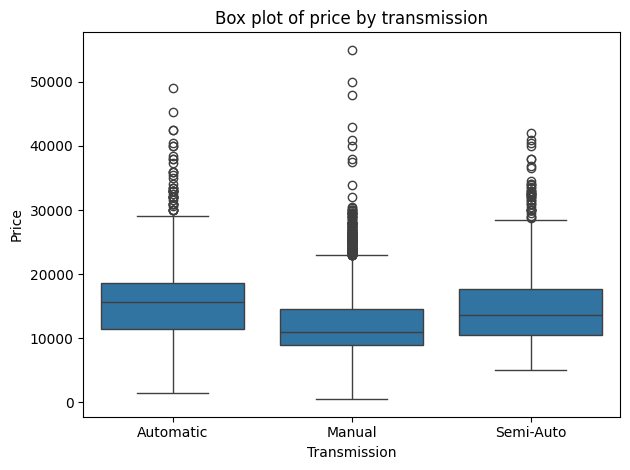

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn box plot: price distribution by transmission category
sns.boxplot(x='transmission', y='price', data=df)

plt.title('Box plot of price by transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**Extra prompt:**
- for the previous prompt, write a python code to count the number of outliers for each category of "transmission" versus "price"

In [11]:
# Count outliers per transmission category for price using the 1.5*IQR rule
outlier_counts = df.groupby('transmission')['price'].apply(
    lambda s: (
        (s < (q1 := s.quantile(0.25)) - 1.5 * ((q3 := s.quantile(0.75)) - q1))
        | (s > q3 + 1.5 * (q3 - q1))
    ).sum()
)

print(outlier_counts)

transmission
Automatic     44
Manual       193
Semi-Auto     41
Name: price, dtype: int64


4. Generate the regression plot between `mpg` parameter and the `price` to determine the correlation type between the two.

**Prompt:**

- Write a Python code that creates a regression plot between the  'mpg' attribute and the target 'price' attribute in a dataframe df.



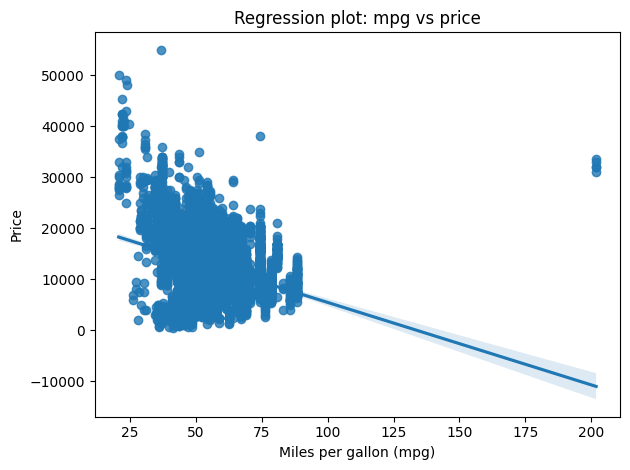

In [12]:
# Regression plot for mpg (feature) against price (target)
sns.regplot(x='mpg', y='price', data=df)

plt.title('Regression plot: mpg vs price')
plt.xlabel('Miles per gallon (mpg)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## Model Development and Evaluation

Write prompts that generate codes to perform the following actions.

1. Fit a linear regression model to predict the `price` using the feature `mpg`. Then calculate the **R^2** and **MSE** values for the model.

**prompt:**

- Write a Python code to fit a linear regression model on a target variable "price" on basis of a source variable "mpg". Calculate the R^2 values and MSE values for this model. the data is stored in a dataframe "df", use scikit-learn library.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data: drop rows with missing values in mpg or price
subset = df[['mpg', 'price']].dropna()
X = subset[['mpg']].to_numpy(dtype=float)  # 2D array of shape (n_samples, 1)
y = subset['price'].to_numpy(dtype=float)

# Fit linear regression model: price ~ mpg
model = LinearRegression()
model.fit(X, y)

# Predict on training data
y_pred = model.predict(X)

# Evaluate metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Output model parameters and metrics
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2:", r2)
print("MSE:", mse)

Coefficient (slope): -161.8522929698884
Intercept: 21642.211603074495
R^2: 0.1198980224962416
MSE: 19741690.809446193


2. Fit a linear regression model to predict the `price` using the following set of features.`year`, `mileage`, `tax`, `mpg` and `engineSize`. Calculate the **R^2** and **MSE** values for this model.

**Prompt:**

- Write a Python code to fit a linear regression model on a target variable "price" on basis of a set of source variables "year", "mileage", "tax", "mpg" and "engineSize". Calculate the R^2 values and MSE values for this model. data is already preprocessed in a dataframe "df". Use scikit-learn library.

In [15]:
# Prepare data: select preprocessing columns and drop rows with missing values
subset = df[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']].dropna()
X = subset[['year', 'mileage', 'tax', 'mpg', 'engineSize']].to_numpy(dtype=float)
y = subset['price'].to_numpy(dtype=float)

# Fit multiple linear regression: price ~ year + mileage + tax + engineSize
model = LinearRegression()
model.fit(X, y)

# Predict on the training data
y_pred = model.predict(X)

# Evaluate metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2:", r2)
print("MSE:", mse)

Coefficients: [ 1.21580626e+03 -5.82440184e-02  7.84883721e-01 -8.11703402e+01
  5.34031546e+03]
Intercept: -2441083.776813836
R^2: 0.7265379654546953
MSE: 6134065.224381845


3. For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

**Prompt:** 

- For the same set of attributes as above, write a Python code that can perform the following tasks.

    1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
    2. Fit this pipeline for the target variable using the set of source attributes from the dataframe "df".
    3. Evaluate the R^2 and MSE values for the trained model.


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score, mean_squared_error

# Prepare data: use same feature set as earlier
subset = df[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']].dropna()

X = subset[['year', 'mileage', 'tax', 'mpg', 'engineSize']].to_numpy(dtype=float)
y = subset['price'].to_numpy(dtype=float)

# Create a pipeline: StandardScaler -> PolynomialFeatures(2) -> Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(X, y)

# Predict on training data
y_pred = pipeline.predict(X)

# Evaluate metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.7666619695239302
MSE: 5234038.06546274


4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the **R^2** using the test data.

**Prompt:**
- In a dataframe "df" the columns 'year', 'mileage', 'tax', 'mpg' and 'engineSize' are the source attributes and "price" is the target attribute. Write a Python code that can perform the following tasks.

    1. subset the attributes from the dataframe and split the data into training and testing data assuming the testing data to be 20%.
    2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
    3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

subset = df[['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']].dropna()
# Ensure numeric types
subset = subset.astype(float)
X = subset[['year', 'mileage', 'tax', 'mpg', 'engineSize']].to_numpy(dtype=float)
y = subset['price'].to_numpy(dtype=float)
      
# 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression with alpha = 0.1
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.6917134446113238
MSE: 6912725.801054699


5. Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the **R^2** and **MSE** utilising the modified test data.

**Prompt:**

- Write a Python code that can perform the following tasks.

    1. Assuming "X" as the source variable and "y" as the target variable, split the data into training and testing data assuming the testing data to be 20%.
    2. Apply second degree polynomial scaling to the training and testing data.
    3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
    4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming X is the feature matrix and y is the target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict on the transformed test data
y_pred = ridge_model.predict(X_test_poly)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.6f}")
print(f"R^2: {r2:.6f}")

MSE: 7326174.878139
R^2: 0.673275


c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.1777e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


6. In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

**Prompt:** 

1. For the "X" and "y" variables defined above, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Grid search on Ridge regression with 4-fold cross validation using the training data and the parameter alpha {0.01, 0.1, 1, 10, 100}.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Assume X and y are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline: polynomial features then ridge regression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge())
])

# Grid search over alpha values
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=4)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best alpha: {grid_search.best_params_.get('ridge__alpha')}")
print(f"Test MSE: {mse:.6f}")
print(f"Test R^2: {r2:.6f}")

c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.0567e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.98143e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.10209e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.85743e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_mode

Best alpha: 0.01
Test MSE: 13840985.986354
Test R^2: 0.382734


c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.99171e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.77667e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.79036e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.73946e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\kekohueko\PyDev\E2\lib\site-packages\sklearn\linear_mod